#Importing Data

In [85]:
import numpy as np
import pandas as pd
##Load data from Share Drive URL
url="https://drive.google.com/uc?export=download&id=1XDiC-nTY8iAtYsGIwBC8s2nFiTfwdCr6"
df= pd.read_excel(url, header=0)
df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,72498
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,58847
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,21186
3,JUL,-0.04,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,6815
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,9227


**Checking data type**

In [86]:
df.dtypes

Month               object
Q0                 float64
Q1                 float64
Q2pt5              float64
Q5                 float64
Q10                float64
Q25                float64
Q50                float64
Q75                float64
Q90                float64
Q95                float64
Q97pt5             float64
Q99                float64
Q100               float64
STNAME              object
CTYNAME             object
POPESTIMATE2015      int64
dtype: object

**We notice above that some values contain negative values which could possibly indicate background noises caused by the data composition process.**




#EDA

#Summary Statistics

In [87]:
summarystats = df.describe()
summarystats = summarystats.transpose()
summarystats


,count,mean,std,min,25%,50%,75%,max
Q0,2500.0,-0.002188,0.141941,-0.58,-0.01,0.000,0.000000,2.610000e+00
Q1,2500.0,0.038799,0.171293,-0.28,0.00,0.000,0.030000,2.773600e+00
Q2pt5,2500.0,0.053699,0.230851,-0.18,0.00,0.000,0.050000,6.000000e+00
Q5,2500.0,0.070809,0.304831,-0.12,0.00,0.000,0.070000,7.636000e+00
Q10,2500.0,0.097120,0.425011,-0.07,0.00,0.000,0.090000,1.053000e+01
Q25,2500.0,0.174372,0.825364,-0.02,0.00,0.000,0.140000,1.771000e+01
Q50,2500.0,0.351830,1.685318,0.00,0.00,0.000,0.230000,3.200000e+01
Q75,2500.0,0.783197,3.355028,0.00,0.00,0.000,0.420000,5.089000e+01
Q90,2500.0,1.777998,6.304048,0.00,0.00,0.000,0.860000,7.474400e+01
Q95,2500.0,2.982530,8.998663,0.00,0.00,0.000,1.583250,9.799000e+01


**Observing the mean and standard deviation we notice that the spread increases as we move from Q0 to Q100 **

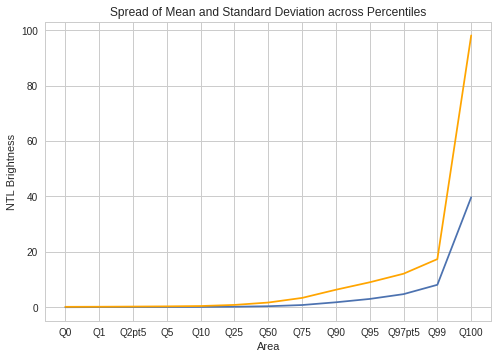

In [88]:
summarystats.iloc[:-1,1]
import matplotlib.pyplot as plt
plt.plot(summarystats.iloc[:-1,1],)
plt.plot(summarystats.iloc[:-1,2], color='orange')
plt.xlabel('Area')
plt.ylabel('NTL Brightness')
plt.title('Spread of Mean and Standard Deviation across Percentiles')
plt.show()

**We observe that the steep increase in mean and standard deviation from Q99.  This could possibly signify that the 1% of the regions in the Counties are heavily illumniated.  (Ex:Downtown areas, fishing fleets, gas flares etc)**



#Outlier Treatment

In [89]:
#replacing negative values with 0
x = df.iloc[:,1:14]
x[x<0] = 0
x

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100
0,0.00,0.0000,0.00,0.0000,0.00,0.00,0.000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.02,0.0800,0.09,0.1100,0.13,0.18,0.300,0.7200,1.890000,4.110000,10.37625,18.979000,95.500000
2,0.10,0.1500,0.16,0.1800,0.20,0.23,0.300,0.4600,0.820000,1.363000,3.11650,7.080800,42.669998
3,0.00,0.0300,0.04,0.0500,0.07,0.12,0.210,0.4700,0.920000,1.500000,2.93425,8.313700,203.500000
4,0.00,0.0000,0.00,0.0000,0.00,0.00,0.000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.00,0.0000,0.00,0.0000,0.00,0.00,0.000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.03,0.0900,0.10,0.1200,0.13,0.17,0.250,0.4400,0.840000,1.670000,4.34000,13.411400,443.970001
7,0.00,0.0000,0.00,0.0600,0.14,0.31,0.620,1.2900,3.460000,8.190000,14.84000,29.493000,70.690002
8,0.00,0.0000,0.00,0.0000,0.00,0.00,0.000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.43,0.7000,0.85,1.1500,1.61,3.07,6.215,19.7475,49.415001,66.650002,79.70625,94.057999,149.139999


**We replace the negative values with zero because they are anomalies which could signify signal errors.**

#Histogram


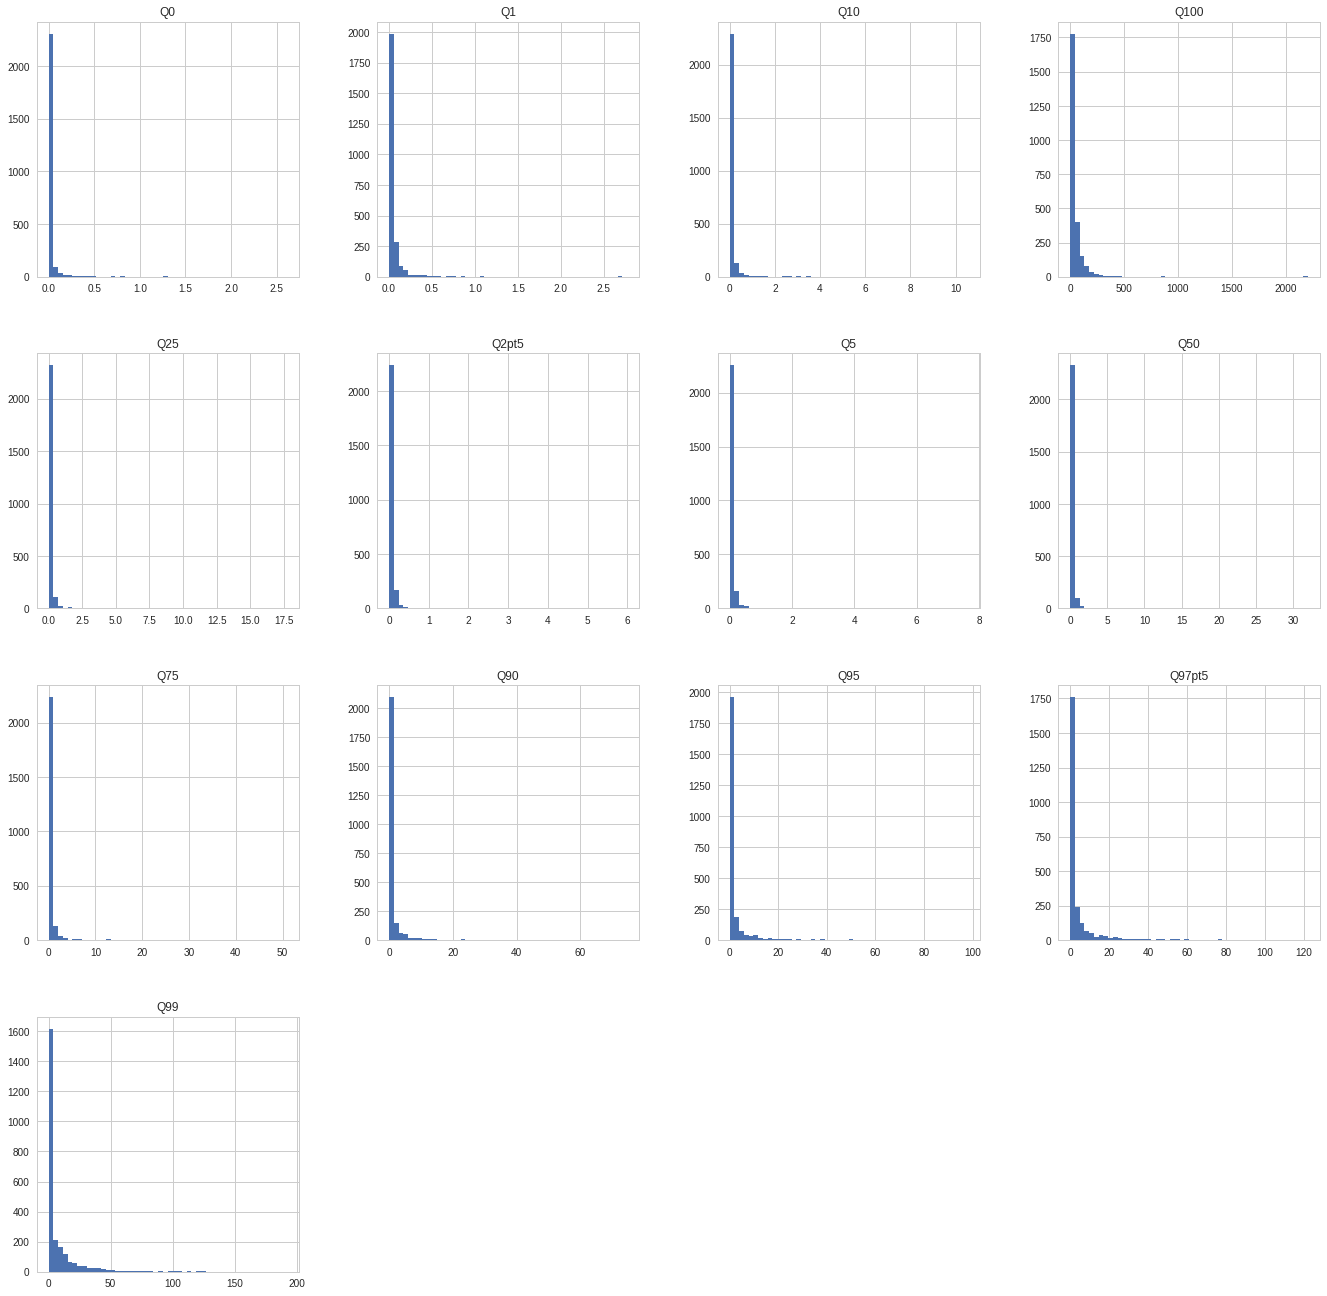

In [90]:
hist = x.hist(bins= 50,figsize=(23,23))
plt.show()  

In [91]:
from scipy.stats import skew

x.skew()

Q0        12.138583
Q1        10.697999
Q2pt5     13.452513
Q5        13.198496
Q10       12.985098
Q25       11.762683
Q50       10.628399
Q75        8.226600
Q90        6.377306
Q95        5.348247
Q97pt5     4.519535
Q99        3.937826
Q100      11.316395
dtype: float64

Obswrving the histogram and the skewness values we notice that data is right skewed

In [92]:
from scipy.stats import kurtosis

x.kurtosis()

Q0        182.628057
Q1        142.583102
Q2pt5     252.587838
Q5        234.016936
Q10       224.194323
Q25       169.753442
Q50       135.982999
Q75        80.110994
Q90        47.679737
Q95        34.208295
Q97pt5     24.968438
Q99        20.812739
Q100      205.992976
dtype: float64

Positive kurtosis indicated heavier tails and sharper peaks

#Boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


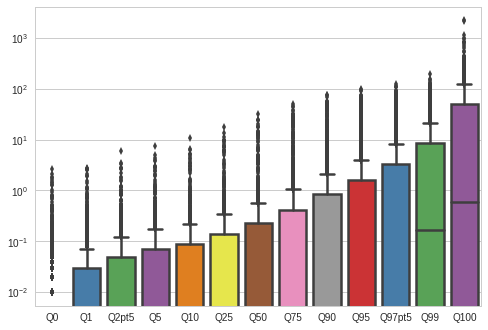

In [93]:
import seaborn as sns
bx = sns.boxplot(data=x, orient="v", palette="Set1", linewidth=2.5)
bx.set_yscale('log')

#Checking  For Missing Value 


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Month              2500 non-null object
Q0                 2500 non-null float64
Q1                 2500 non-null float64
Q2pt5              2500 non-null float64
Q5                 2500 non-null float64
Q10                2500 non-null float64
Q25                2500 non-null float64
Q50                2500 non-null float64
Q75                2500 non-null float64
Q90                2500 non-null float64
Q95                2500 non-null float64
Q97pt5             2500 non-null float64
Q99                2500 non-null float64
Q100               2500 non-null float64
STNAME             2500 non-null object
CTYNAME            2500 non-null object
POPESTIMATE2015    2500 non-null int64
dtypes: float64(13), int64(1), object(3)
memory usage: 332.1+ KB


In [95]:
df.isnull().sum()

Month              0
Q0                 0
Q1                 0
Q2pt5              0
Q5                 0
Q10                0
Q25                0
Q50                0
Q75                0
Q90                0
Q95                0
Q97pt5             0
Q99                0
Q100               0
STNAME             0
CTYNAME            0
POPESTIMATE2015    0
dtype: int64

**The dataset does not contain any missing values**

#Multivarriate Corelation 

In [96]:
corr_df=df.corr()
corr_df

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
Q0,1.000000,0.910696,0.837970,0.793873,0.773482,0.725014,0.670084,0.640391,0.588285,0.560529,0.525452,0.481608,0.085210,0.087600
Q1,0.910696,1.000000,0.961216,0.928695,0.911026,0.852861,0.784739,0.745694,0.691713,0.663841,0.632467,0.599028,0.194373,0.114423
Q2pt5,0.837970,0.961216,1.000000,0.983382,0.968300,0.904305,0.830181,0.773183,0.703014,0.665626,0.626304,0.595661,0.193352,0.113486
Q5,0.793873,0.928695,0.983382,1.000000,0.987860,0.922130,0.844007,0.782164,0.704939,0.662991,0.619061,0.585346,0.187053,0.115335
Q10,0.773482,0.911026,0.968300,0.987860,1.000000,0.961139,0.885470,0.815556,0.728775,0.682610,0.634998,0.592781,0.185893,0.127203
Q25,0.725014,0.852861,0.904305,0.922130,0.961139,1.000000,0.958659,0.885306,0.785759,0.729656,0.676465,0.621121,0.191604,0.170530
Q50,0.670084,0.784739,0.830181,0.844007,0.885470,0.958659,1.000000,0.958177,0.862584,0.802642,0.743734,0.677327,0.215612,0.252104
Q75,0.640391,0.745694,0.773183,0.782164,0.815556,0.885306,0.958177,1.000000,0.952427,0.902500,0.846819,0.774875,0.261663,0.350162
Q90,0.588285,0.691713,0.703014,0.704939,0.728775,0.785759,0.862584,0.952427,1.000000,0.984406,0.947561,0.884534,0.327898,0.415954
Q95,0.560529,0.663841,0.665626,0.662991,0.682610,0.729656,0.802642,0.902500,0.984406,1.000000,0.986206,0.940170,0.378233,0.415859


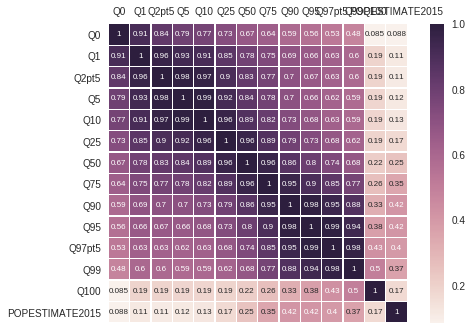

In [97]:
sns.heatmap(corr_df, square=True,linewidths=0.30,annot=True,annot_kws={"size": 8}).xaxis.tick_top()
plt.show()

Observing the correlation heatmap, we notice that the populationestimate shows moderate correlation with Q95,Q90 and Q97.5. (correlation value ~ 0.42). This  signifies that the brightness value for 99 percentile could be a good estimate of population. 

#Feature Scaling

**Checking the Range of each variable**

In [98]:
for key,value in x.iteritems() :
  range1 = print(key,min(value))
  range2 =print(key,max(value))

Q0 0.0
Q0 2.609999895
Q1 0.0
Q1 2.773600054
Q2pt5 0.0
Q2pt5 6.0
Q5 0.0
Q5 7.635999966
Q10 0.0
Q10 10.52999973
Q25 0.0
Q25 17.70999908
Q50 0.0
Q50 32.0
Q75 0.0
Q75 50.88999939
Q90 0.0
Q90 74.7439971923828
Q95 0.0
Q95 97.98999786
Q97pt5 0.0
Q97pt5 122.1910019
Q99 0.0
Q99 191.8300018
Q100 0.0
Q100 2209.040039


#Scale Function


In [99]:
from sklearn.preprocessing import scale
scaled_variables = scale(x)
scaled_variables = pd.DataFrame(scaled_variables, index=x.index, columns=x.columns)
scaled_variables

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100
0,-0.176439,-0.255736,-0.243959,-0.236397,-0.229356,-0.211324,-0.208804,-0.233486,-0.282097,-0.331508,-0.390401,-0.466058,-0.404397
1,-0.013882,0.217683,0.147561,0.124968,0.076642,0.006806,-0.030760,-0.018840,0.017770,0.125318,0.468431,0.627680,0.569290
2,0.636343,0.631925,0.452077,0.354927,0.241410,0.067397,-0.030760,-0.096351,-0.151996,-0.180011,-0.132452,-0.058000,0.030652
3,-0.176439,-0.078204,-0.069950,-0.072140,-0.064588,-0.065904,-0.084173,-0.093370,-0.136130,-0.164783,-0.147536,0.013051,1.670422
4,-0.176439,-0.255736,-0.243959,-0.236397,-0.229356,-0.211324,-0.208804,-0.233486,-0.282097,-0.331508,-0.390401,-0.466058,-0.404397
5,-0.176439,-0.255736,-0.243959,-0.236397,-0.229356,-0.211324,-0.208804,-0.233486,-0.282097,-0.331508,-0.390401,-0.466058,-0.404397
6,0.067396,0.276861,0.191064,0.157819,0.076642,-0.005313,-0.060434,-0.102314,-0.148823,-0.145888,-0.031184,0.306825,4.122174
7,-0.176439,-0.255736,-0.243959,-0.039289,0.100180,0.164344,0.159153,0.151088,0.266866,0.578810,0.837892,1.233590,0.316335
8,-0.176439,-0.255736,-0.243959,-0.236397,-0.229356,-0.211324,-0.208804,-0.233486,-0.282097,-0.331508,-0.390401,-0.466058,-0.404397
9,3.318521,3.886679,3.453733,3.541501,3.560308,3.509005,3.479666,5.653633,7.558085,7.076630,6.206812,4.954398,1.116185


In [100]:
#checking the range of values
for key,value in scaled_variables.iteritems() :
  range1 = print(key,min(value))
  range2 =print(key,max(value))

Q0 -0.1764385820818665
Q0 21.03715469678638
Q1 -0.25573564511006674
Q1 16.15769554215379
Q2pt5 -0.24395893339089988
Q2pt5 25.857396981780607
Q5 -0.2363965374863155
Q5 24.84884500953767
Q10 -0.22935611001798537
Q10 24.556457693492618
Q25 -0.2113244007966786
Q25 21.25024868864218
Q50 -0.20880361075216636
Q50 18.78251477975229
Q75 -0.23348647979389145
Q75 14.937826549519038
Q90 -0.28209715222705006
Q90 11.576782327447175
Q95 -0.33150778545626736
Q95 10.560066560358823
Q97pt5 -0.3904014823763298
Q97pt5 9.723235388614441
Q99 -0.46605848079780426
Q99 10.588887495080849
Q100 -0.40439672785604736
Q100 22.11824179289141


**Since we are getting negative values, we use Min - Max Scaler to scale values within a range of 0 to 1.**

#Min-Max Scaler

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_variables_1 = scaler.fit_transform(x)
scaled_variables_1 = pd.DataFrame(scaled_variables_1, index=x.index, columns=x.columns)
scaled_variables_1



,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007663,0.028843,0.015000,0.014405,0.012346,0.010164,0.009375,0.014148,0.025286,0.041943,0.084918,0.098937,0.043231
2,0.038314,0.054081,0.026667,0.023573,0.018993,0.012987,0.009375,0.009039,0.010971,0.013910,0.025505,0.036912,0.019316
3,0.000000,0.010816,0.006667,0.006548,0.006648,0.006776,0.006562,0.009236,0.012309,0.015308,0.024014,0.043339,0.092121
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.011494,0.032449,0.016667,0.015715,0.012346,0.009599,0.007812,0.008646,0.011238,0.017043,0.035518,0.069913,0.200979
7,0.000000,0.000000,0.000000,0.007858,0.013295,0.017504,0.019375,0.025349,0.046291,0.083580,0.121449,0.153746,0.032000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.164751,0.252380,0.141667,0.150602,0.152896,0.173348,0.194219,0.388043,0.661123,0.680171,0.652309,0.490320,0.067513


In [102]:
for key,value in scaled_variables_1.iteritems() :
  range1 = print(key,min(value))
  range2 =print(key,max(value))

Q0 0.0
Q0 1.0
Q1 0.0
Q1 1.0
Q2pt5 0.0
Q2pt5 1.0
Q5 0.0
Q5 0.9999999999999999
Q10 0.0
Q10 1.0
Q25 0.0
Q25 1.0
Q50 0.0
Q50 1.0
Q75 0.0
Q75 1.0
Q90 0.0
Q90 1.0
Q95 0.0
Q95 1.0
Q97pt5 0.0
Q97pt5 1.0
Q99 0.0
Q99 0.9999999999999999
Q100 0.0
Q100 1.0


**Test - Train Split**

Before running the cross validation, we run a normal train- test split to get an initial understanding of the modeling process. 
Here we have performed a **75:25** split

In [0]:
y = df.POPESTIMATE2015
x_test = scaled_variables_1[:-1875] 
x_train = scaled_variables_1[-1875:]
y_test = y[:-1875]
y_train = y[-1875:]

#Dimension Reduction

Since the 13 continous variables seem to show correlation we perform dimension reduction using PCA to avoid redundancy and possibly reduce the chance of overfitting

**PCA**

In [104]:
from sklearn.decomposition import PCA
pca_x = PCA(n_components =5, svd_solver='full')
pca_x.fit(x_train)
x_train_pca = pca_x.transform(x_train)
x_test_pca= pca_x.transform(x_test)
np.cumsum(np.round(pca_x.explained_variance_ratio_,decimals=4)*100)



array([80.75, 91.83, 95.73, 98.07, 99.13])

**PCA for Cross Validation **

In [105]:
from sklearn.decomposition import PCA
pca_x = PCA(n_components =6, svd_solver='full')
pca_x.fit(scaled_variables_1)
x_scaled_pca= pca_x.transform(scaled_variables_1)
principaldf =pd.DataFrame(data=x_scaled_pca)
np.cumsum(np.round(pca_x.explained_variance_ratio_,decimals=4)*100)


array([81.54, 92.45, 96.03, 98.18, 99.09, 99.51])

Text(0, 0.5, 'Explained Variance')

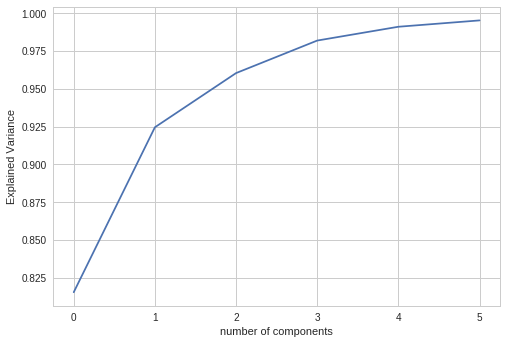

In [106]:
plt.plot(np.cumsum(pca_x.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained Variance')

From the above the plot we observe that the 5 components explain 99.51 % of variance and thus we reduce the dimensionality to 5 components.

In [107]:
x_train_pca.shape

(1875, 5)

#Models Without Cross Validation

#**Linear Regression **


In [0]:
from sklearn import linear_model

Coefficients: 
 [  653296.58564269 -1210281.81296559 -1456090.50065706   797742.00482489
 -2790158.82512622]
R- Squared : 0.11499996969964443
MAE Test: 102389.14659744516 
RMSE: 258681.5430448397 
MAPE : 676.3154088923428


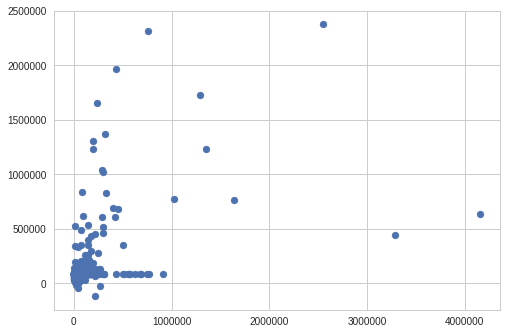

In [109]:
# Create linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(x_train_pca, y_train)

# Make predictions using the testing set
pop_pred = regression.predict(x_test_pca)

plt.scatter(y_test,pop_pred)
print('Coefficients: \n', regression.coef_)

#R-squared Value
from sklearn.metrics import r2_score

print("R- Squared : %r" % r2_score(y_test,pop_pred))

#MAE
from sklearn.metrics import mean_absolute_error 
print("MAE Test: %r " % mean_absolute_error(y_test, pop_pred))

#RMSE
print("RMSE: %r " % np.sqrt(np.mean((pop_pred - y_test) ** 2)))

#MAPE
print("MAPE : %r" % (np.mean(np.abs((y_test - pop_pred) / y_test)) * 100))


#Random Forest

[0.12473827 0.56826752 0.25064493 0.01736616 0.03898312]
R- Squared : -0.06563773941416651
MAE Test: 104906.04353117406 
RMSE: 283856.3384500841 
MAPE : 804.9902701087647


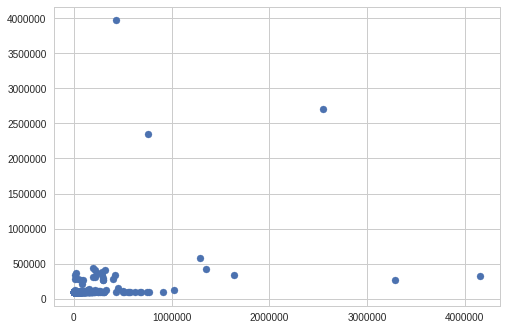

In [110]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
rand.fit(x_train_pca, y_train)
print(rand.feature_importances_)
pred_rand=rand.predict(x_test_pca)
plt.scatter(y_test,pred_rand)

#R-squared Value
print("R- Squared : %r" % r2_score(y_test,pred_rand))
#MAE
from sklearn.metrics import mean_absolute_error 
print("MAE Test: %r " % mean_absolute_error(y_test, pred_rand))
#RMSE
print("RMSE: %r " % np.sqrt(np.mean((pred_rand - y_test) ** 2)))
#MAPE
print("MAPE : %r" % (np.mean(np.abs((y_test - pred_rand) / y_test)) * 100))

#GBM

R- Squared : 0.07858996178277344
MAE Test: 103426.55455843509 
RMSE: 263949.1511975497 
MAPE : 810.20800471422


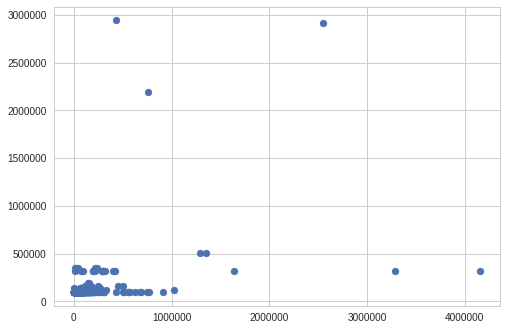

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
regr_gbm = GradientBoostingRegressor(n_estimators=10)
regr_gbm.fit(x_train_pca, y_train)

pred_gbm = regr_gbm.predict(x_test_pca)
expected = y_test
pred_gbm
plt.scatter(y_test,pred_gbm)
#R-squared Value
print("R- Squared : %r" % r2_score(y_test,pred_gbm))
#MAE
from sklearn.metrics import mean_absolute_error 
print("MAE Test: %r " % mean_absolute_error(y_test,pred_gbm))
#RMSE
print("RMSE: %r " % np.sqrt(np.mean((pred_gbm - y_test) ** 2)))
#MAPE
print("MAPE : %r" % (np.mean(np.abs((y_test - pred_gbm) / y_test)) * 100))


**Feature Importance**

[0.05164432 0.61511818 0.22745365 0.08270524 0.0230786 ]


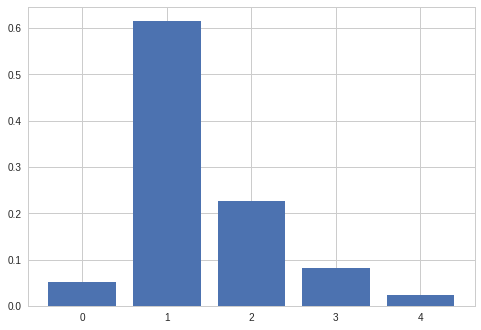

In [112]:
print(regr_gbm.feature_importances_)
# plot
plt.bar(range(len(regr_gbm.feature_importances_)), regr_gbm.feature_importances_)
plt.show()

#Cross Validation

#Merging the the target variable with the scaled dataset

In [113]:
principaldf =pd.DataFrame(data=x_scaled_pca)
df_cv =pd.DataFrame()
df_cv = principaldf
df_cv['POPESTIMATE2015'] = y

df_cv

,0,1,2,3,4,5,POPESTIMATE2015
0,-0.075136,0.014328,-0.015356,-0.000014,0.004400,-0.001236,72498
1,0.054874,-0.033955,0.039476,-0.010531,-0.018437,0.008674,58847
2,-0.001808,0.047849,0.031365,-0.016578,0.007939,0.004733,21186
3,-0.017840,-0.015971,0.054072,0.051705,0.007376,-0.002214,6815
4,-0.075136,0.014328,-0.015356,-0.000014,0.004400,-0.001236,9227
5,-0.075136,0.014328,-0.015356,-0.000014,0.004400,-0.001236,10671
6,0.017962,-0.029473,0.146814,0.108299,0.022677,-0.004188,48170
7,0.113752,-0.087907,0.016385,-0.018672,-0.041030,0.019028,67607
8,-0.075136,0.014328,-0.015356,-0.000014,0.004400,-0.001236,42562
9,1.296064,-0.137675,-0.132851,-0.042892,0.123463,-0.106505,239665


#**Cross Validation**

#Linear

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
def mean_absolute_percentage_error(true,predict):
  return (np.mean(np.abs((true - predict) / true)) * 100)

Defined function mean_absolute_percentage_error (**MAPE**) to make it resusable and available for cross validation process.

In [116]:
MAE_test_reg=[]
MAPE_test_reg=[]
MAE_train_reg=[]
MAPE_train_reg=[]

k = 10
fold = np.array_split(df_cv, k)

def cv(regression, train_set, test_set):
  
    train_target = train_set.pop('POPESTIMATE2015').values
    test_target = test_set.pop('POPESTIMATE2015').values
    regression.fit(train_set, train_target)
    
    reg_pred_test=regression.predict(test_set)
    reg_pred_train=regression.predict(train_set)
    
    MAE_test_reg.append(mean_absolute_error(test_target, reg_pred_test))
    MAPE_test_reg.append(mean_absolute_percentage_error(test_target, reg_pred_test))
    MAE_train_reg.append(mean_absolute_error(train_target, reg_pred_train))
    MAPE_train_reg.append(mean_absolute_percentage_error(train_target, reg_pred_train))
        
for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(regression, train.copy(), test.copy())
    
MAE_test_lr= np.std(MAE_test_reg)    
MAPE_test_lr=np.std(MAPE_test_reg) 
MAE_train_lr=np.std(MAE_train_reg)
MAPE_train_lr=np.std(MAPE_train_reg)

print("MAE Test :"  ,MAE_test_lr)
print("MAPE Test :" , MAPE_test_lr)
print("MAE Train:"  , MAE_train_lr)
print("MAPE Train:",MAPE_train_lr)

MAE Test : 17643.303545731487
MAPE Test : 184.98513096745785
MAE Train: 3950.5281438859415
MAPE Train: 47.13898343837188


**Building Cross Validation**


*  **Defining Variable:** First we define the number of folds by taking the value in 'k'  

*  Fold is calcuated by dividing the dataset by k. (using array_split function )

*  **Loop : ** Passing i through k in a loop, we get the train and test set
    *  Fold is copied onto an empty train set
    
    *  ith element is extracted and stored in the test set  and is discarded from the train set. Thus, the test set will have k subsample and the training         set will have (k-1) subsamples
    
    *  We call a function cv with regression, train set  and test set

*   **Function CV**
    *   We extract train and test target variable using pop function and then fit a regression model on the training set
    
    *    Next we predict the test set and train set and store it in reg_pred_test and reg_pred_train respectively
    
    * Evaluation Metrics such as MAPE, MAE are calculated and their respective standard deviations are computed to get better understanding of        the model performance
    
    


Similarly we evaluate cross validation for Random Forest and GBM



#Random Forest

In [117]:
#initialization of variables
MAE_test_reg=[]
MAPE_test_reg=[]
MAE_train_reg=[]
MAPE_train_reg=[]

k = 10
fold = np.array_split(df_cv, k)

def cv(rand, train_set, test_set):
    train_target = train_set.pop('POPESTIMATE2015').values
    test_target = test_set.pop('POPESTIMATE2015').values
    rand.fit(train_set, train_target)
    
    reg_pred_test=rand.predict(test_set)
    reg_pred_train=rand.predict(train_set)
    
    MAE_test_reg.append(mean_absolute_error(test_target, reg_pred_test))
    MAPE_test_reg.append(mean_absolute_percentage_error(test_target, reg_pred_test))
    MAE_train_reg.append(mean_absolute_error(train_target, reg_pred_train))
    MAPE_train_reg.append(mean_absolute_percentage_error(train_target, reg_pred_train))
        
for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(rand, train.copy(), test.copy())
    
MAE_test_rf= np.std(MAE_test_reg)    
MAPE_test_rf=np.std(MAPE_test_reg) 
MAE_train_rf=np.std(MAE_train_reg)
MAPE_train_rf=np.std(MAPE_train_reg)

print("MAE Test :"  ,MAE_test_rf)
print("MAPE Test :" , MAPE_test_rf)
print("MAE Train:"  , MAE_train_rf)
print("MAPE Train:",MAPE_train_rf)


MAE Test : 19221.371668470878
MAPE Test : 720.6031173102098
MAE Train: 3612.7016614359136
MAPE Train: 96.30338110672388


#GBM

In [118]:
MAE_test_reg=[]
MAPE_test_reg=[]
MAE_train_reg=[]
MAPE_train_reg=[]
k = 10
fold = np.array_split(df_cv, k)

def cv(regr_gbm, train_set, test_set):
    # remove labels from data
    train_target = train_set.pop('POPESTIMATE2015').values
    test_target = test_set.pop('POPESTIMATE2015').values
    regr_gbm.fit(train_set, train_target)
    
    reg_pred_test=regr_gbm.predict(test_set)
    reg_pred_train=regr_gbm.predict(train_set)
    
    MAE_test_reg.append(mean_absolute_error(test_target, reg_pred_test))
    MAPE_test_reg.append(mean_absolute_percentage_error(test_target, reg_pred_test))
    MAE_train_reg.append(mean_absolute_error(train_target, reg_pred_train))
    MAPE_train_reg.append(mean_absolute_percentage_error(train_target, reg_pred_train))
        
for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(regr_gbm, train.copy(), test.copy())
    
MAE_test_gbm= np.std(MAE_test_reg)    
MAPE_test_gbm=np.std(MAPE_test_reg) 
MAE_train_gbm=np.std(MAE_train_reg)
MAPE_train_gbm=np.std(MAPE_train_reg)

print("MAE Test :"  ,MAE_test_gbm)
print("MAPE Test :" , MAPE_test_gbm)
print("MAE Train:"  , MAE_train_gbm)
print("MAPE Train:",MAPE_train_gbm)


MAE Test : 19357.834705135992
MAPE Test : 357.825637960595
MAE Train: 3833.9891888685415
MAPE Train: 63.47773785833882


#Metrics Table

In [119]:
table= {'Model':['Linear Regression','RandomForest','GBM'],'MAPE_Train':[MAPE_train_lr,MAPE_train_rf,MAPE_train_gbm],
        'MAE_Train': [MAE_train_lr,MAE_train_rf,MAE_train_gbm],'MAPE_Test': [MAPE_test_lr,MAPE_test_rf,MAPE_test_gbm],
        'MAE_Test': [MAE_test_lr,MAE_test_rf,MAE_test_gbm]}
summarytable = pd.DataFrame(data=table)
summarytable

,MAE_Test,MAE_Train,MAPE_Test,MAPE_Train,Model
0,17643.303546,3950.528144,184.985131,47.138983,Linear Regression
1,19221.371668,3612.701661,720.603117,96.303381,RandomForest
2,19357.834705,3833.989189,357.825638,63.477738,GBM


Upon Cross Validation and evaluation of metrics, we observe that residual variation of  Linear Regression is lesser than Random forest and GBM.   Thus, Linear Regression is the better model.

#50 worst predicted counties in the US

In [120]:
final = abs(y_test-pop_pred)
worst = df
worst['ERROR VALUE'] = final

#arrange the column based on highest error values in descending order
worst_50 = worst.nlargest(50, 'ERROR VALUE') 
top_50 = pd.DataFrame(worst_50,columns=['CTYNAME','ERROR VALUE'])
top_50

,CTYNAME,ERROR VALUE
595,Maricopa,3.522481e+06
614,San Diego,2.846100e+06
183,Jefferson,1.553159e+06
223,Jefferson Parish,1.529571e+06
9,Lafayette Parish,1.416697e+06
571,Richmond,1.102178e+06
487,Fayette,1.049455e+06
437,Muscogee,1.031170e+06
477,Alameda,8.703488e+05
264,Prince George's,8.248244e+05


#Box Plots of Metrics For CA, TX, FL

In [121]:
scaled_variables_1['STNAME'] = df.STNAME
scaled_variables_1['CTYNAME'] = df.CTYNAME
scaled_variables_1['POPESTIMATE2015'] = df.POPESTIMATE2015

scaled_variables_1

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Maryland,Allegany,72498
1,0.007663,0.028843,0.015000,0.014405,0.012346,0.010164,0.009375,0.014148,0.025286,0.041943,0.084918,0.098937,0.043231,Alabama,Russell,58847
2,0.038314,0.054081,0.026667,0.023573,0.018993,0.012987,0.009375,0.009039,0.010971,0.013910,0.025505,0.036912,0.019316,Georgia,Meriwether,21186
3,0.000000,0.010816,0.006667,0.006548,0.006648,0.006776,0.006562,0.009236,0.012309,0.015308,0.024014,0.043339,0.092121,Louisiana,Cameron Parish,6815
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Iowa,Clarke,9227
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Idaho,Teton,10671
6,0.011494,0.032449,0.016667,0.015715,0.012346,0.009599,0.007812,0.008646,0.011238,0.017043,0.035518,0.069913,0.200979,Texas,Navarro,48170
7,0.000000,0.000000,0.000000,0.007858,0.013295,0.017504,0.019375,0.025349,0.046291,0.083580,0.121449,0.153746,0.032000,Illinois,Williamson,67607
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Minnesota,Kandiyohi,42562
9,0.164751,0.252380,0.141667,0.150602,0.152896,0.173348,0.194219,0.388043,0.661123,0.680171,0.652309,0.490320,0.067513,Louisiana,Lafayette Parish,239665


In [0]:
data1= scaled_variables_1[(df.STNAME != 'California') | (df.STNAME != 'Texas') | (df.STNAME != 'Florida') ] 
data2= scaled_variables_1[(df.STNAME == 'California') | (df.STNAME == 'Texas') | (df.STNAME == 'Florida') ]



**Data1 (Test)** : Contains observations for California, Texas and Florida

**Data2 (Test)**: Contains rest of the observations

In [123]:
test_y = data2['POPESTIMATE2015']
test_x=data2.iloc[:,0:13]

train_y = data1['POPESTIMATE2015']
train_x=data1.iloc[:,0:13]

regression.fit(train_x,train_y)
pred_sc = regression.predict(test_x)

#R-squared Value
print("R- Squared : %r" % r2_score(test_y,pred_sc))
#MAE
from sklearn.metrics import mean_absolute_error 
print("MAE Test: %r " % mean_absolute_error(test_y,pred_sc))
#RMSE
print("RMSE: %r " % np.sqrt(np.mean((pred_sc - test_y) ** 2)))
#MAPE
print("MAPE : %r" % (np.mean(np.abs((test_y - pred_sc) /test_y)) * 100))


R- Squared : 0.4464105945644846
MAE Test: 178023.31252453168 
RMSE: 593783.2251767779 
MAPE : 1211.3552142460514


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

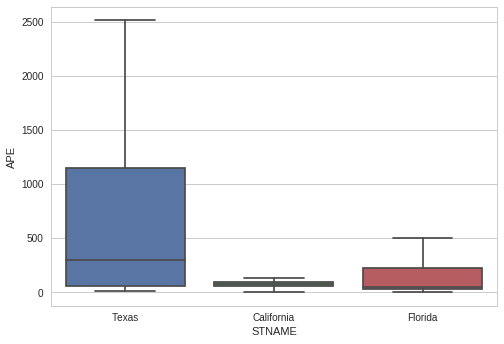

In [124]:
data2['Predicted']= pred_sc
data2
data2['APE'] = (abs(data2['POPESTIMATE2015']-data2['Predicted'])/abs(data2['POPESTIMATE2015']))*100
data2['AE']=abs(data2['POPESTIMATE2015']-data2['Predicted'])
data2
sns.set(style="whitegrid")
ax = sns.boxplot(y="APE", x="STNAME",showfliers=False, data=data2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


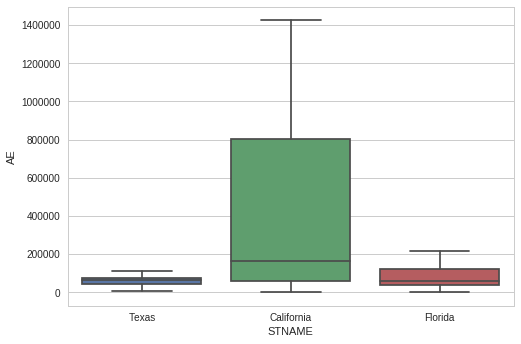

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


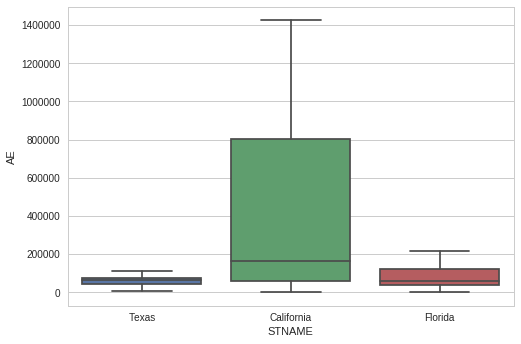

In [125]:
bx = sns.boxplot(y="AE", x="STNAME",showfliers=False, data=data2)